In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('cancer.csv')

In [3]:
df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN,NaN,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN,NaN,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN,NaN,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN,NaN,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN,NaN,NaN


In [25]:
df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [5]:
df.drop(columns=['Unnamed: 11','Unnamed: 12','Unnamed: 13'],inplace =True)

In [6]:
df.shape

(699, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [29]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [27]:
df['Bare Nuclei'].replace(to_replace='',value = np.NaN ,inplace =True)

In [28]:
df.isna().sum()

ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  683 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [34]:
from sklearn.impute import KNNImputer
knnimpute  =KNNImputer()
ximpu =knnimpute.fit_transform(df)

In [35]:
dfnonull =pd.DataFrame(ximpu,columns=df.columns)

In [36]:
dfnonull.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [38]:
dfnonull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           699 non-null    float64
 1   ClumpThickness               699 non-null    float64
 2   Cell Size                    699 non-null    float64
 3   Cell Shape                   699 non-null    float64
 4   Marginal Adhesion            699 non-null    float64
 5   Single Epithelial Cell Size  699 non-null    float64
 6   Bare Nuclei                  699 non-null    float64
 7   Normal Nucleoli              699 non-null    float64
 8   Bland Chromatin              699 non-null    float64
 9   Mitoses                      699 non-null    float64
 10  Class                        699 non-null    float64
dtypes: float64(11)
memory usage: 60.2 KB


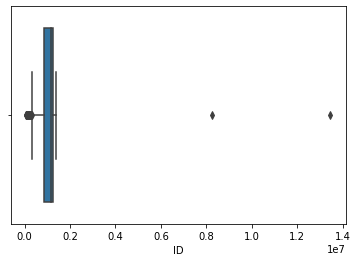

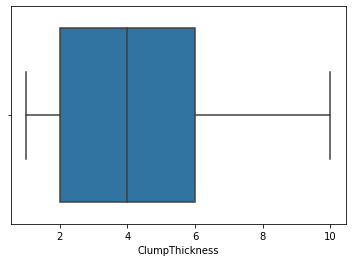

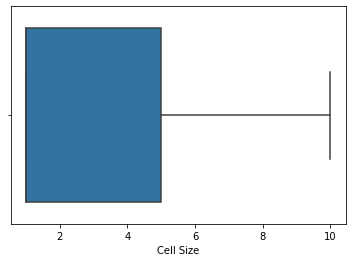

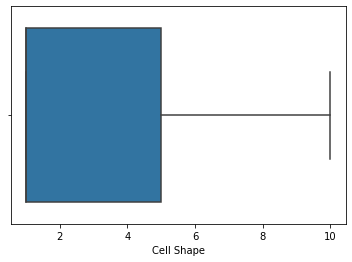

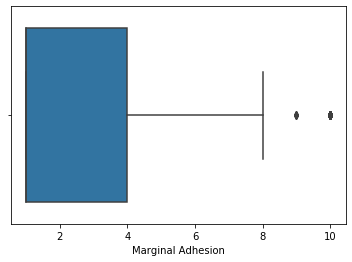

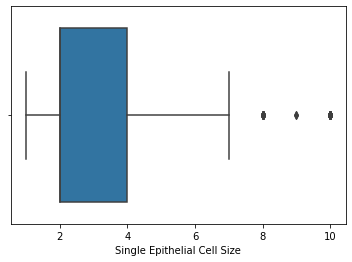

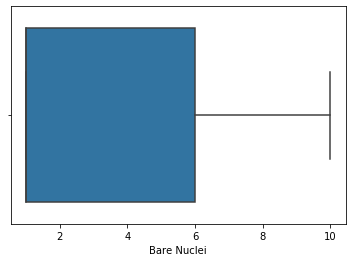

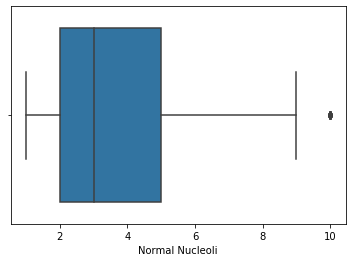

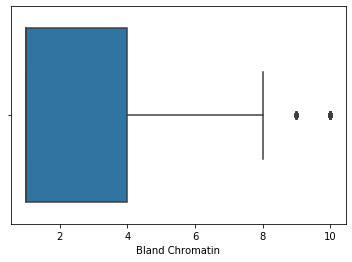

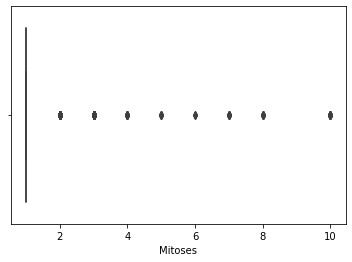

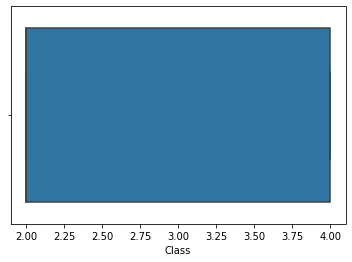

In [39]:
for j in dfnonull.columns:
    sns.boxplot(dfnonull[j])
    #df[j].plot(kind ='boxplot')
    plt.show()

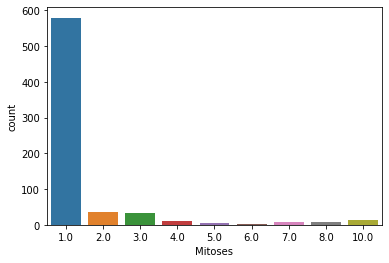

In [42]:
sns.countplot(dfnonull.Mitoses)

In [43]:
dfnonull.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


In [44]:
df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [46]:
dfnonull =dfnonull.astype('int')

In [51]:
dfnonull.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## apply PCA

In [52]:
y = dfnonull['Class']
x = dfnonull.drop(columns ='Class')


In [57]:
x.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1


In [59]:
from sklearn.preprocessing import StandardScaler
xscaled =StandardScaler().fit_transform(x)

In [56]:
x.shape

(699, 10)

In [60]:
cov_matrix = np.cov(xscaled.T)

In [61]:
cov_matrix.shape

(10, 10)

In [62]:
eigval ,eigvect =np.linalg.eig(cov_matrix)

In [63]:
print('Eigen Vectors \n%s', eigval)
print('\n Eigen Values \n%s', eigvect)

Eigen Vectors 
%s [5.90098265 1.00210706 0.77677258 0.08894257 0.53965935 0.46101177
 0.38069461 0.26214083 0.29656518 0.30545005]

 Eigen Values 
%s [[-3.37826692e-02  9.92661294e-01  6.80125881e-02 -1.73699042e-03
  -9.45162252e-04  7.91508945e-02  7.72424957e-03 -2.37346744e-02
   2.85137010e-02  3.39377380e-02]
 [ 3.02531043e-01 -5.36307672e-03  1.40757142e-01 -2.19771546e-03
   8.63191862e-01  1.13401214e-01  6.77715012e-02 -2.33161363e-01
   2.76724725e-02 -2.66356552e-01]
 [ 3.80980769e-01  4.47052043e-02  5.26044422e-02 -7.35438604e-01
  -1.25328385e-02 -1.95499642e-01 -1.36067354e-01  4.51577191e-01
  -1.91681634e-01 -1.07993591e-01]
 [ 3.77386003e-01  4.06301092e-02  8.82161248e-02  6.65719781e-01
   4.01531067e-02 -1.65902720e-01 -1.03619902e-01  5.91155833e-01
  -1.21812487e-01 -2.80627536e-02]
 [ 3.32776362e-01 -1.32328201e-02  4.30980364e-02  4.64216896e-02
  -4.27660575e-01  4.64663463e-01  3.08108778e-02 -1.05593589e-01
   1.53632985e-01 -6.71240836e-01]
 [ 3.36206616e-

In [65]:
tot = sum(eigval)
var_exp = [( i /tot ) * 100 for i in sorted(eigval, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 58.92540619  68.9321405   76.68875366  82.07762668  86.68114911
  90.48264892  93.5327796   96.49418868  99.11184675 100.        ]


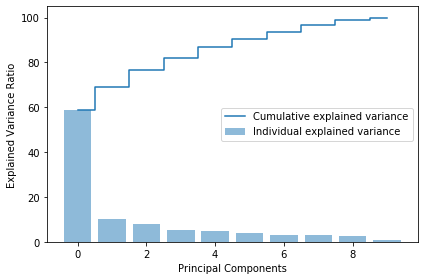

In [67]:
plt.figure(figsize=(6 , 4))
plt.bar(range(10), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(10), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

##### we can take n =5 (PCA's) for 95 variance of information saving.

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xscaled, y, test_size=0.33, random_state=42)

In [94]:
from sklearn.decomposition import PCA
pca =PCA(n_components =5)
xtrainpca = pca.fit_transform(X_train)


In [95]:
xtestpca = pca.transform(X_test)

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()

In [97]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
ytestpred =rf.predict(X_test)
ytrainpred =rf.predict(X_train)


In [99]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(ytestpred,y_test)


0.9783549783549783

In [101]:
accuracy_score(ytrainpred,y_train)


1.0

In [102]:
# pca data

In [103]:
rfpca =RandomForestClassifier()

In [104]:
rfpca.fit(xtrainpca,y_train)
ypredpca =rfpca.predict(xtrainpca)
ytestpca =rfpca.predict(xtestpca)


In [105]:
accuracy_score(ypredpca,y_train)

1.0

In [106]:
accuracy_score(ytestpca,y_test)

0.9826839826839827

In [ ]:
after applying the pca the accuracy has slight increament